## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  90.467907  1508.072467  0.054956  4.014543  0.676310
1  42.279931  1370.648938  0.637571  7.296318  1.496157
2  87.774687  1461.317593  0.312854  4.212158  1.422463
3  17.493641  1456.599021  0.331661  2.102258  1.442004
4  68.100365  1146.156001  0.266244  2.968897  1.251029


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0130544	total: 58.5ms	remaining: 58.4s
1:	learn: 1.0019337	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9907290	total: 60.9ms	remaining: 20.2s
3:	learn: 0.9803517	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9679350	total: 62.8ms	remaining: 12.5s
5:	learn: 0.9561218	total: 63.6ms	remaining: 10.5s
6:	learn: 0.9481271	total: 64.3ms	remaining: 9.12s
7:	learn: 0.9329758	total: 64.9ms	remaining: 8.05s
8:	learn: 0.9232403	total: 65.6ms	remaining: 7.22s
9:	learn: 0.9115681	total: 66.2ms	remaining: 6.55s
10:	learn: 0.9008811	total: 66.7ms	remaining: 6s
11:	learn: 0.8903698	total: 67.2ms	remaining: 5.53s
12:	learn: 0.8801252	total: 67.8ms	remaining: 5.14s
13:	learn: 0.8660806	total: 68.1ms	remaining: 4.79s
14:	learn: 0.8597882	total: 68.8ms	remaining: 4.51s
15:	learn: 0.8503581	total: 69.8ms	remaining: 4.29s
16:	learn: 0.8424105	total: 70.8ms	remaining: 4.09s
17:	learn: 0.8338525	total: 72ms	remaining: 3.92s
18:	learn: 0.8245742	total: 72.6ms	remaining: 3.7

67:	learn: 0.4965357	total: 111ms	remaining: 1.53s
68:	learn: 0.4922810	total: 112ms	remaining: 1.51s
69:	learn: 0.4874776	total: 112ms	remaining: 1.49s
70:	learn: 0.4833810	total: 113ms	remaining: 1.48s
71:	learn: 0.4797953	total: 113ms	remaining: 1.46s
72:	learn: 0.4748910	total: 114ms	remaining: 1.45s
73:	learn: 0.4697473	total: 115ms	remaining: 1.43s
74:	learn: 0.4650465	total: 115ms	remaining: 1.42s
75:	learn: 0.4602354	total: 116ms	remaining: 1.41s
76:	learn: 0.4561415	total: 116ms	remaining: 1.39s
77:	learn: 0.4527443	total: 117ms	remaining: 1.38s
78:	learn: 0.4485292	total: 117ms	remaining: 1.37s
79:	learn: 0.4452352	total: 118ms	remaining: 1.36s
80:	learn: 0.4413658	total: 119ms	remaining: 1.34s
81:	learn: 0.4377131	total: 119ms	remaining: 1.33s
82:	learn: 0.4340965	total: 120ms	remaining: 1.32s
83:	learn: 0.4305818	total: 120ms	remaining: 1.31s
84:	learn: 0.4267145	total: 121ms	remaining: 1.3s
85:	learn: 0.4232738	total: 122ms	remaining: 1.29s
86:	learn: 0.4192311	total: 122m

286:	learn: 0.1428664	total: 244ms	remaining: 606ms
287:	learn: 0.1422239	total: 245ms	remaining: 607ms
288:	learn: 0.1417670	total: 246ms	remaining: 605ms
289:	learn: 0.1411646	total: 247ms	remaining: 604ms
290:	learn: 0.1408138	total: 247ms	remaining: 602ms
291:	learn: 0.1401355	total: 248ms	remaining: 601ms
292:	learn: 0.1396168	total: 248ms	remaining: 599ms
293:	learn: 0.1393607	total: 249ms	remaining: 597ms
294:	learn: 0.1390336	total: 249ms	remaining: 596ms
295:	learn: 0.1384635	total: 250ms	remaining: 594ms
296:	learn: 0.1380919	total: 250ms	remaining: 592ms
297:	learn: 0.1374946	total: 251ms	remaining: 590ms
298:	learn: 0.1372533	total: 251ms	remaining: 588ms
299:	learn: 0.1368992	total: 252ms	remaining: 587ms
300:	learn: 0.1365522	total: 252ms	remaining: 585ms
301:	learn: 0.1362164	total: 253ms	remaining: 584ms
302:	learn: 0.1356656	total: 253ms	remaining: 582ms
303:	learn: 0.1353968	total: 254ms	remaining: 580ms
304:	learn: 0.1350521	total: 254ms	remaining: 579ms
305:	learn: 

576:	learn: 0.0562055	total: 394ms	remaining: 289ms
577:	learn: 0.0560309	total: 395ms	remaining: 288ms
578:	learn: 0.0559257	total: 395ms	remaining: 287ms
579:	learn: 0.0557614	total: 434ms	remaining: 314ms
580:	learn: 0.0555698	total: 442ms	remaining: 319ms
581:	learn: 0.0553720	total: 443ms	remaining: 318ms
582:	learn: 0.0551786	total: 443ms	remaining: 317ms
583:	learn: 0.0549895	total: 444ms	remaining: 316ms
584:	learn: 0.0547975	total: 444ms	remaining: 315ms
585:	learn: 0.0546131	total: 444ms	remaining: 314ms
586:	learn: 0.0543752	total: 445ms	remaining: 313ms
587:	learn: 0.0541345	total: 445ms	remaining: 312ms
588:	learn: 0.0538992	total: 446ms	remaining: 311ms
589:	learn: 0.0537209	total: 446ms	remaining: 310ms
590:	learn: 0.0534919	total: 446ms	remaining: 309ms
591:	learn: 0.0533185	total: 447ms	remaining: 308ms
592:	learn: 0.0531550	total: 448ms	remaining: 307ms
593:	learn: 0.0529046	total: 448ms	remaining: 306ms
594:	learn: 0.0527449	total: 448ms	remaining: 305ms
595:	learn: 

770:	learn: 0.0335261	total: 533ms	remaining: 158ms
771:	learn: 0.0334638	total: 533ms	remaining: 158ms
772:	learn: 0.0333773	total: 534ms	remaining: 157ms
773:	learn: 0.0333161	total: 534ms	remaining: 156ms
774:	learn: 0.0332070	total: 535ms	remaining: 155ms
775:	learn: 0.0331156	total: 535ms	remaining: 154ms
776:	learn: 0.0330553	total: 535ms	remaining: 154ms
777:	learn: 0.0329901	total: 536ms	remaining: 153ms
778:	learn: 0.0329309	total: 537ms	remaining: 152ms
779:	learn: 0.0328056	total: 538ms	remaining: 152ms
780:	learn: 0.0327230	total: 538ms	remaining: 151ms
781:	learn: 0.0326648	total: 538ms	remaining: 150ms
782:	learn: 0.0325758	total: 539ms	remaining: 149ms
783:	learn: 0.0325131	total: 539ms	remaining: 149ms
784:	learn: 0.0324557	total: 540ms	remaining: 148ms
785:	learn: 0.0323338	total: 540ms	remaining: 147ms
786:	learn: 0.0322724	total: 540ms	remaining: 146ms
787:	learn: 0.0321640	total: 541ms	remaining: 145ms
788:	learn: 0.0321078	total: 541ms	remaining: 145ms
789:	learn: 

847:	learn: 0.0278681	total: 607ms	remaining: 110ms
848:	learn: 0.0277767	total: 610ms	remaining: 109ms
849:	learn: 0.0277108	total: 611ms	remaining: 108ms
850:	learn: 0.0276613	total: 611ms	remaining: 107ms
851:	learn: 0.0276010	total: 611ms	remaining: 106ms
852:	learn: 0.0275126	total: 612ms	remaining: 106ms
853:	learn: 0.0274483	total: 613ms	remaining: 105ms
854:	learn: 0.0273892	total: 613ms	remaining: 104ms
855:	learn: 0.0273405	total: 613ms	remaining: 103ms
856:	learn: 0.0272549	total: 614ms	remaining: 103ms
857:	learn: 0.0271922	total: 615ms	remaining: 102ms
858:	learn: 0.0271296	total: 615ms	remaining: 101ms
859:	learn: 0.0270461	total: 616ms	remaining: 100ms
860:	learn: 0.0269633	total: 616ms	remaining: 99.6ms
861:	learn: 0.0269238	total: 617ms	remaining: 98.8ms
862:	learn: 0.0268421	total: 617ms	remaining: 98.1ms
863:	learn: 0.0268031	total: 618ms	remaining: 97.3ms
864:	learn: 0.0267231	total: 618ms	remaining: 96.6ms
865:	learn: 0.0266663	total: 618ms	remaining: 95.8ms
866:	l

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2539127018313138


ABC Pre-generator MAE 0.3231590753515545


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

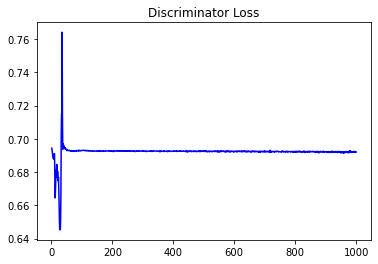

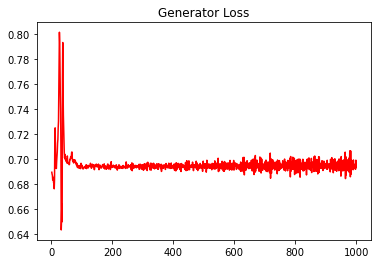

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.2894889589904342


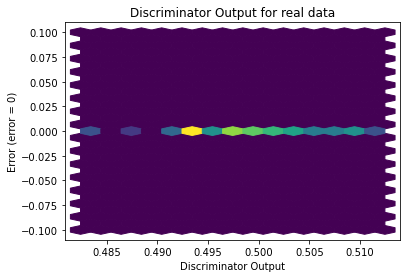

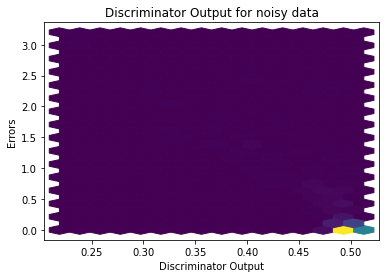

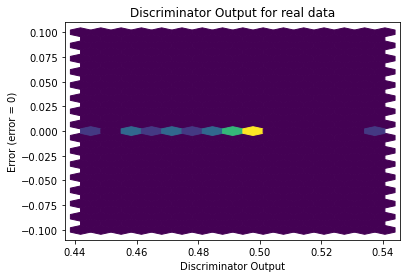

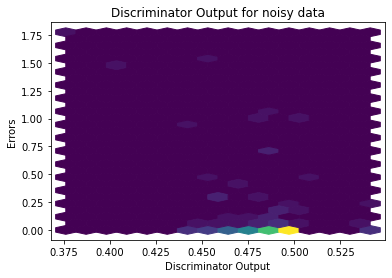

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

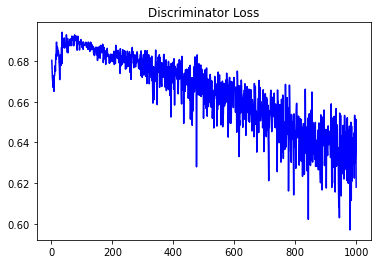

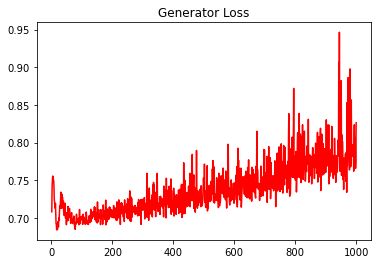

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3080819939761423


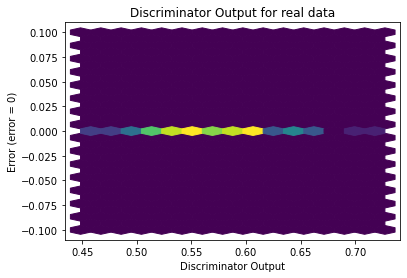

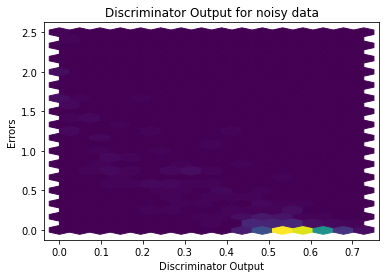

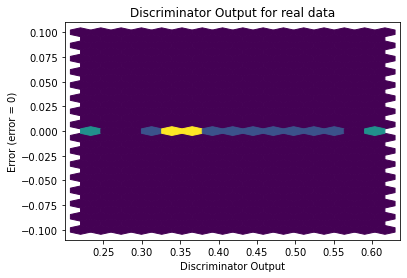

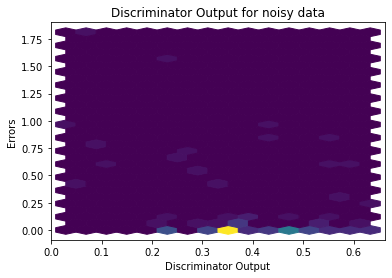

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


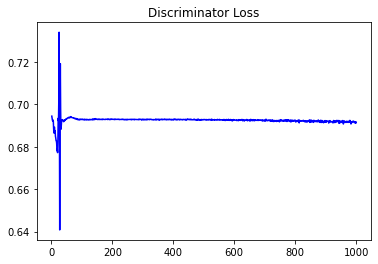

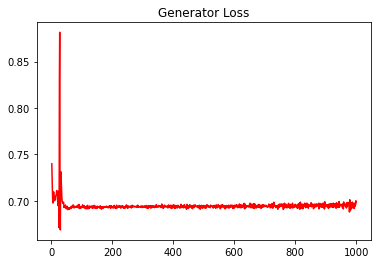

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.3017077587742824


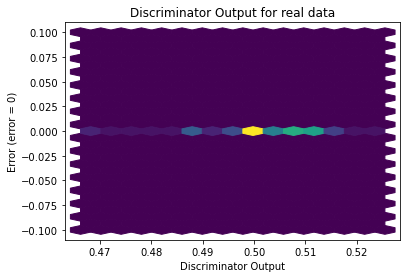

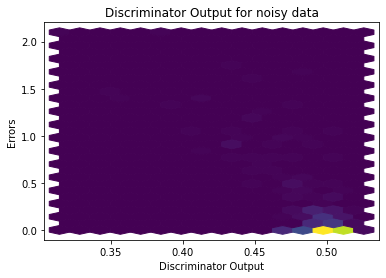

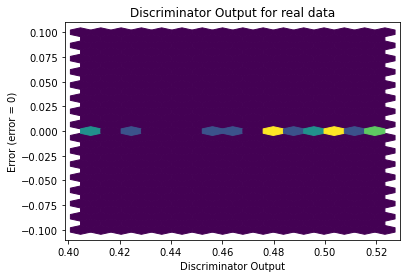

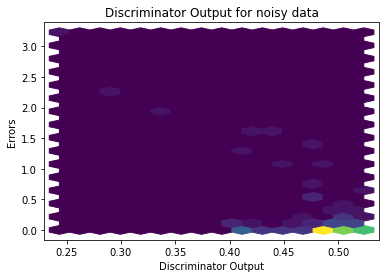

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


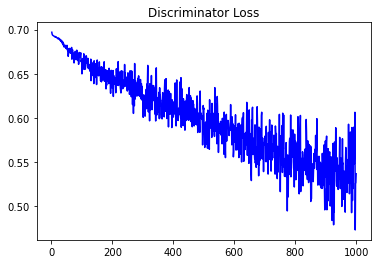

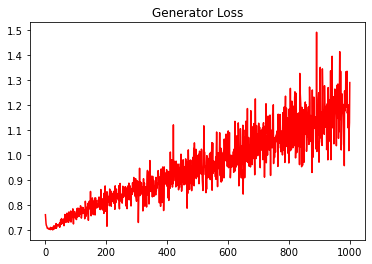

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3119543982779287


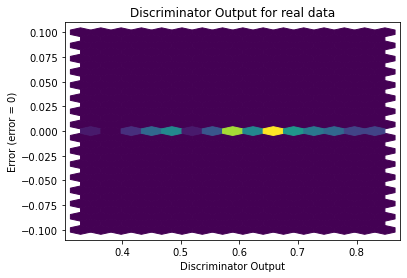

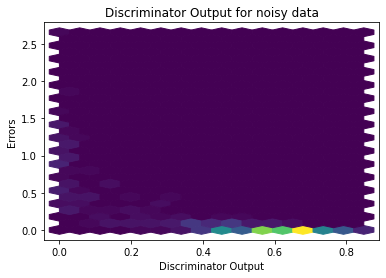

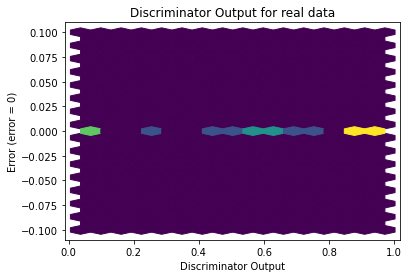

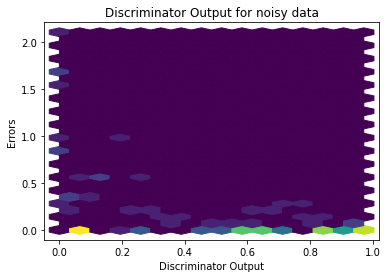

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6130]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
